In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from utils import *

In [2]:
exact = pd.read_csv('../../data/results/exact_method/exact_method-raw_steel_predictions.csv')

# 1. Averaged Steel Noise + Perlin

The model trained on 30,000 images (30 images with the same epsilon value) using averaged steel noise with added Perlin noise. Model was trained for 30 epochs.

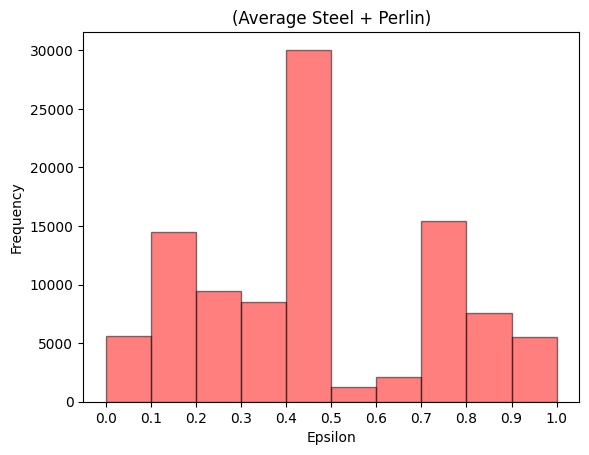

In [3]:
perlin = pd.read_csv('../../data/results/perlin/best_steel_model.csv')
plot_epsilon_distribution(perlin, "(Average Steel + Perlin)")

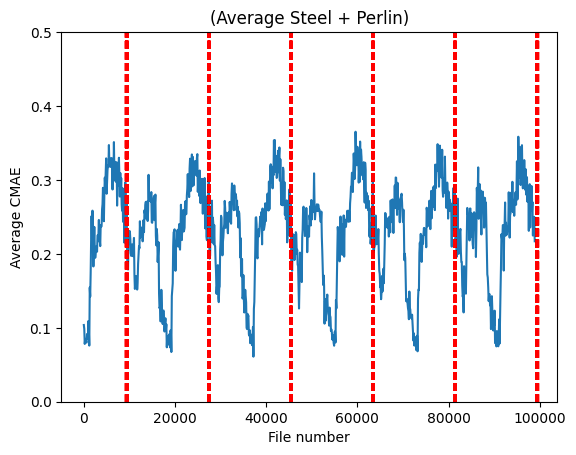

In [4]:
both_perlin = generate_merged_df(perlin, exact)
plot_average_cmae(both_perlin, "(Average Steel + Perlin)")

# 2. Fourier Steel Noise + Perlin

The model trained on 30,000 images (30 images with the same epsilon value) using averaged steel noise with added Perlin noise. Model was trained for 30 epochs with CosineAneallingWarmupRestarts Scheduler.

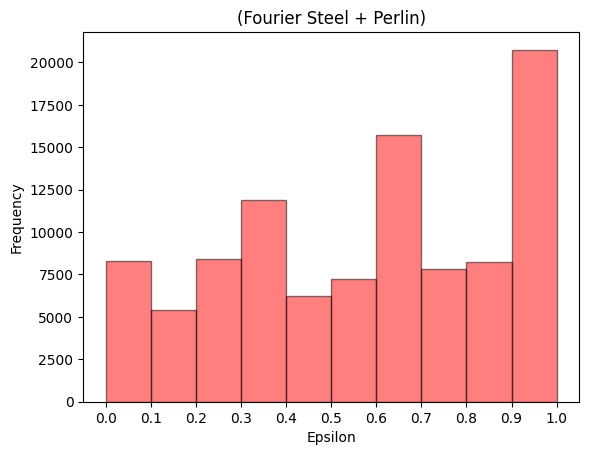

In [5]:
fourier = pd.read_csv('../../data/results/perlin/fourier/best_steel_model.csv')
plot_epsilon_distribution(fourier, "(Fourier Steel + Perlin)")

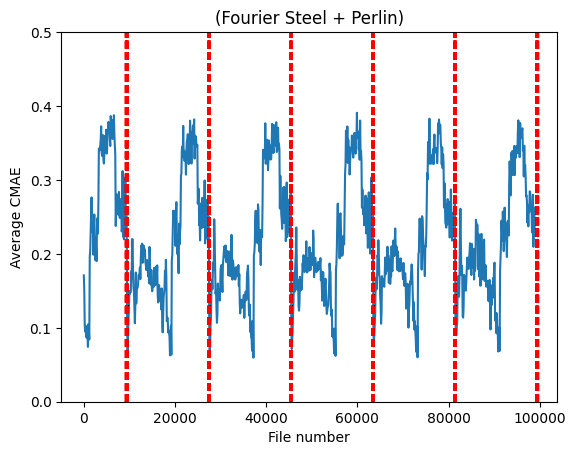

In [6]:
both_fourier = generate_merged_df(fourier, exact)
plot_average_cmae(both_fourier, "(Fourier Steel + Perlin)")

# 3. Fourier Steel Noise + Perlin + Basics images

The model trained on 70,000 images (70 images with the same epsilon value) using averaged steel noise with added Perlin noise + Basic noised images. Model was trained for 30 epochs with CosineAneallingWarmupRestarts Scheduler.

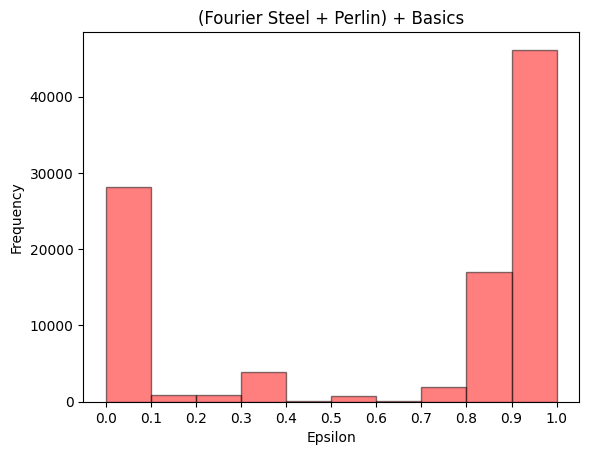

In [7]:
fourier_basics = pd.read_csv('../../data/results/perlin/fourier_basics/best_steel_model.csv')
plot_epsilon_distribution(fourier_basics, "(Fourier Steel + Perlin) + Basics")

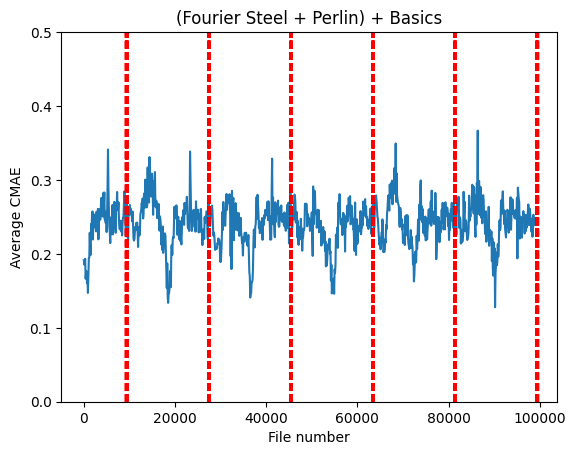

In [8]:
both_fourier_basics = generate_merged_df(fourier_basics, exact)
plot_average_cmae(both_fourier_basics, "(Fourier Steel + Perlin) + Basics")

# 4. Ceramic Average Noise + Perlin

The model trained on 30,000 images (30 images with the same epsilon value) using averaged ceramic noise with added Perlin noise. Model was trained for 30 epochs with CosineAneallingWarmupRestarts Scheduler.

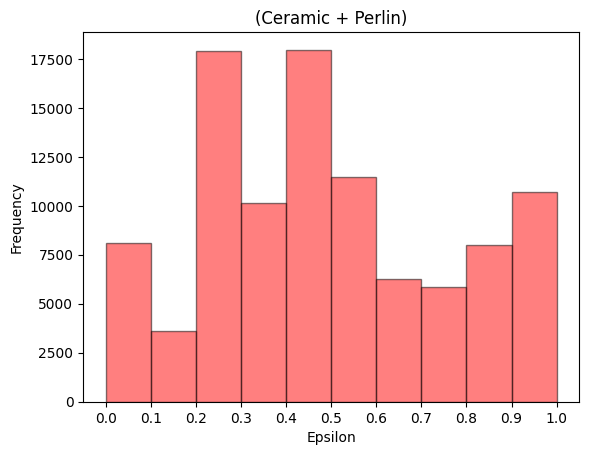

In [9]:
ceramic = pd.read_csv('../../data/results/perlin/ceramic/best_steel_model.csv')
plot_epsilon_distribution(ceramic, "(Ceramic + Perlin)")

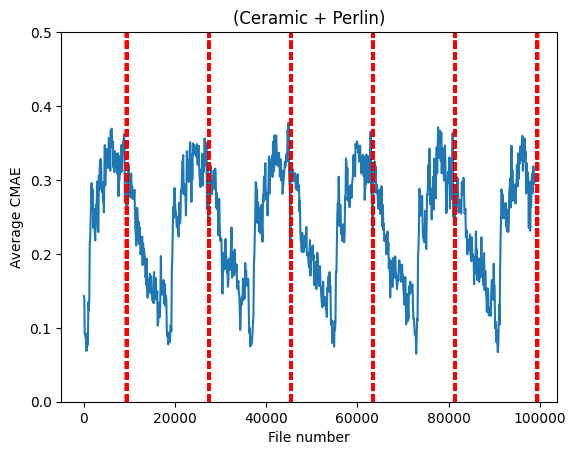

In [10]:
both_ceramic = generate_merged_df(ceramic, exact)
plot_average_cmae(both_ceramic, "(Ceramic + Perlin)")

# 5. Ceramic Average Noise + Fourier Average Noise + Perlin

The model trained on 60,000 images (60 images with the same epsilon value) using averaged ceramic noise, and fourier steel noise, both with added Perlin noise. Model was trained for 30 epochs with CosineAneallingWarmupRestarts Scheduler.

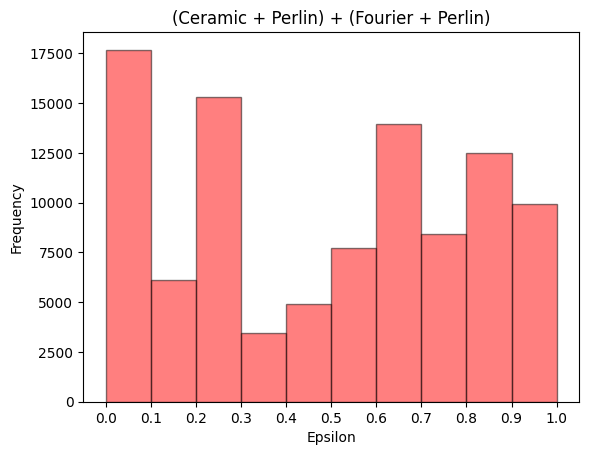

In [11]:
ceramic_fourier = pd.read_csv('../../data/results/perlin/ceramic_fourier/best_steel_model.csv')
plot_epsilon_distribution(ceramic_fourier, "(Ceramic + Perlin) + (Fourier + Perlin)")

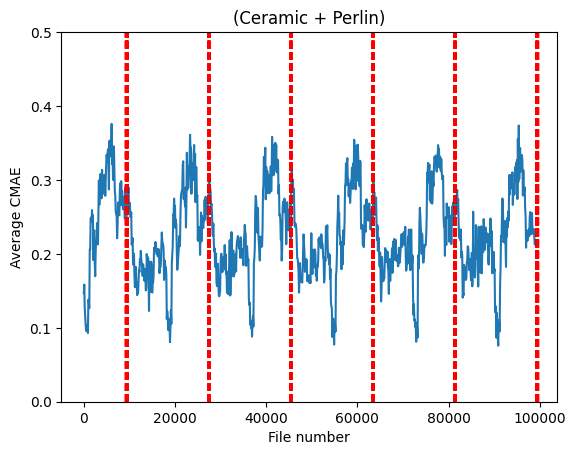

In [12]:
both_ceramic_fourier = generate_merged_df(ceramic_fourier, exact)
plot_average_cmae(both_ceramic_fourier, "(Ceramic + Perlin)")

# 6. Average Steel Noise Moved

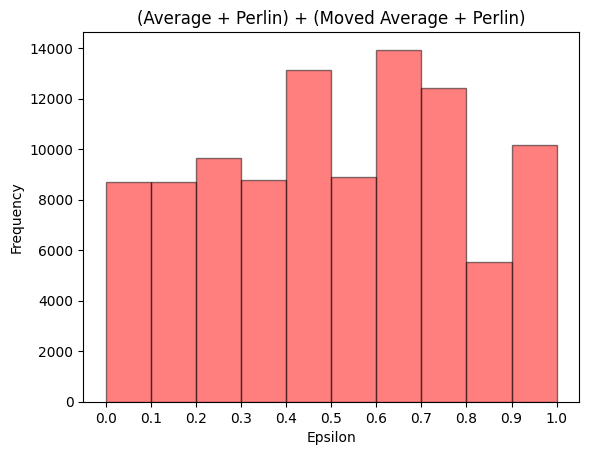

In [10]:
moved = pd.read_csv('../../data/results/perlin/moved/best_steel_model.csv')
plot_epsilon_distribution(moved, "(Average + Perlin) + (Moved Average + Perlin)")

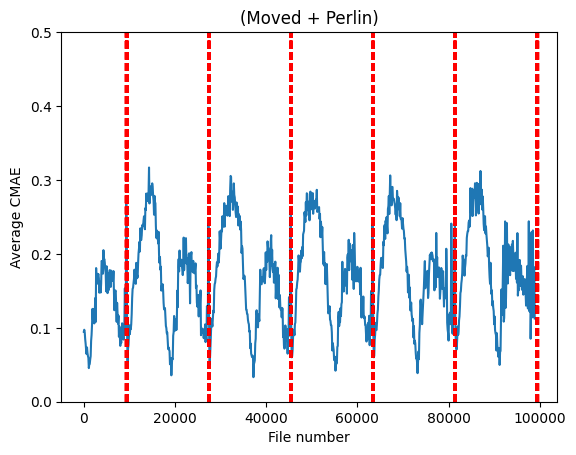

In [11]:
both_moved = generate_merged_df(moved, exact)
plot_average_cmae(both_moved, "(Moved + Perlin)")

# 7 Moved Ceramic Noise

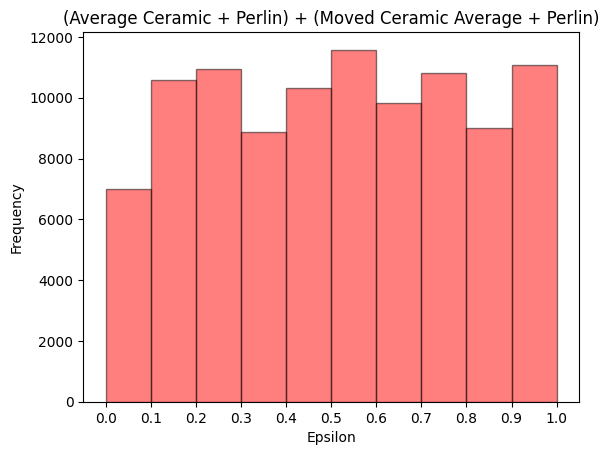

In [12]:
moved_ceramic = pd.read_csv('../../data/results/perlin/moved_ceramic/best_steel_model.csv')
plot_epsilon_distribution(moved_ceramic, "(Average Ceramic + Perlin) + (Moved Ceramic Average + Perlin)")

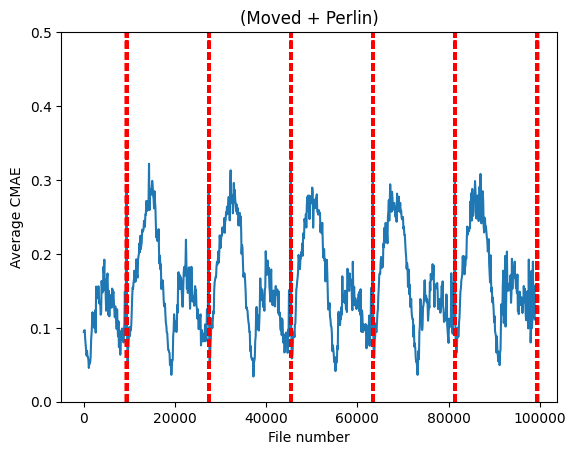

In [15]:
both_moved_ceramic = generate_merged_df(moved_ceramic, exact)
plot_average_cmae(both_moved_ceramic, "(Moved + Perlin)")

In [14]:
moved_fourier = pd.read_csv('../../data/results/perlin/moved_fourier/best_steel_model.csv')
both_moved_fourier = generate_merged_df(moved_fourier, exact)

moved_ceramic_avg = pd.read_csv('../../data/results/perlin/moved_ceramic_avg/best_steel_model.csv')
both_moved_ceramic_avg = generate_merged_df(moved_ceramic_avg, exact)

moved_large = pd.read_csv('../../data/results/perlin/moved_LARGE/best_steel_model.csv')
both_moved_large = generate_merged_df(moved_large, exact)

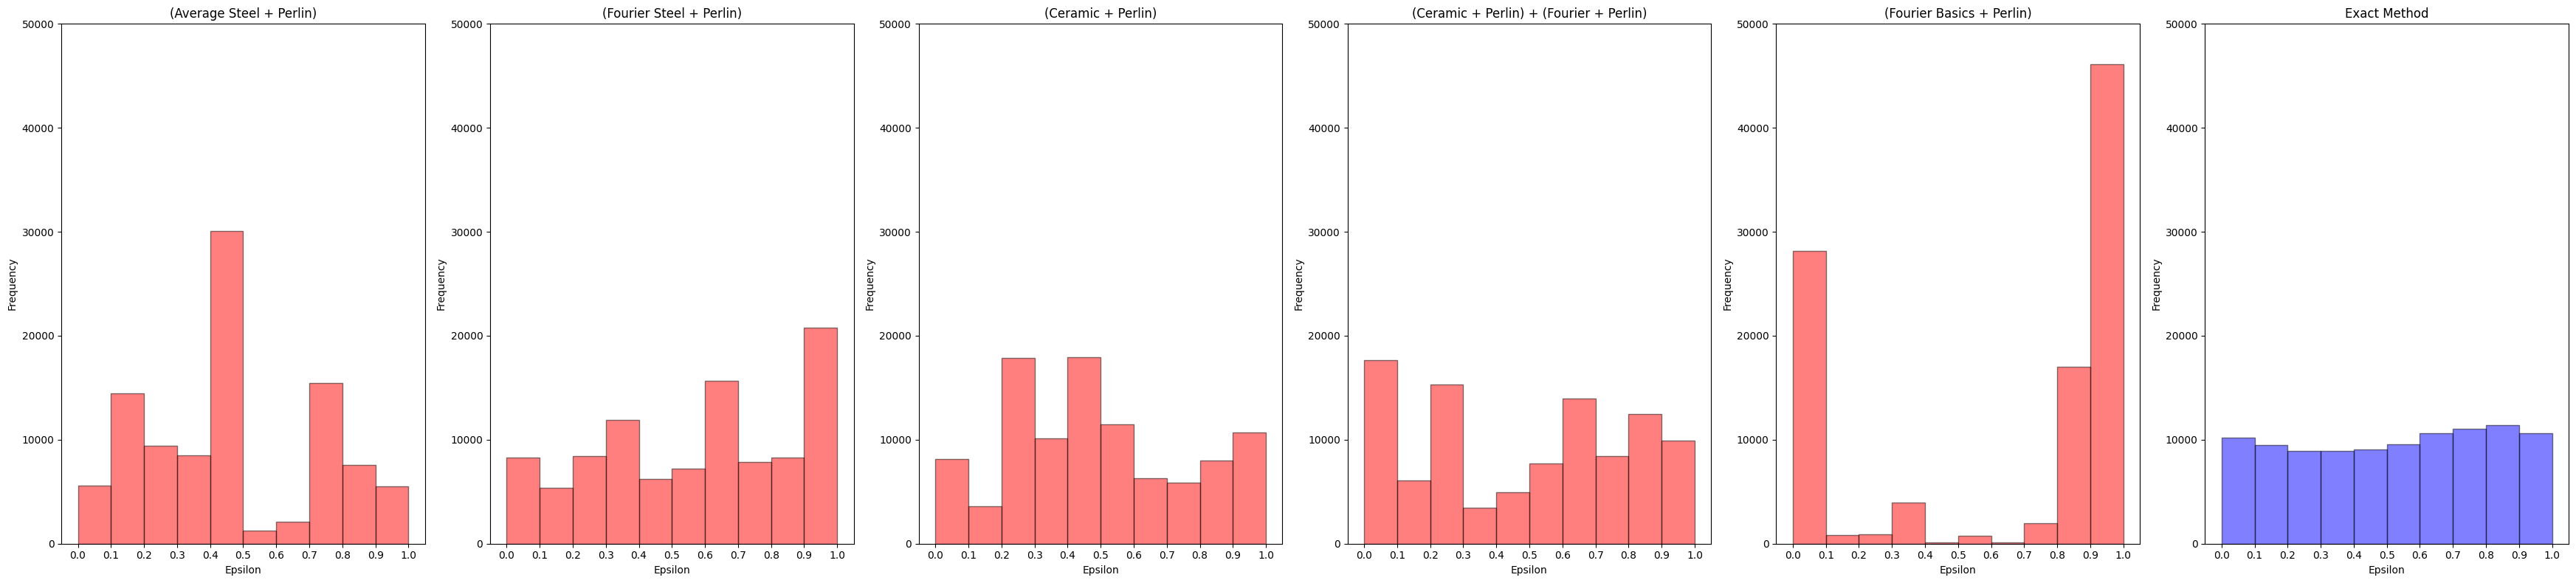

In [30]:
dfs = [perlin, fourier, ceramic, ceramic_fourier, fourier_basics, exact]
labels = ["(Average Steel + Perlin)", "(Fourier Steel + Perlin)",  "(Ceramic + Perlin)", "(Ceramic + Perlin) + (Fourier + Perlin)", "(Fourier Basics + Perlin)", "Exact Method"]
plot_multiple_epsilon_distributions(dfs, labels)


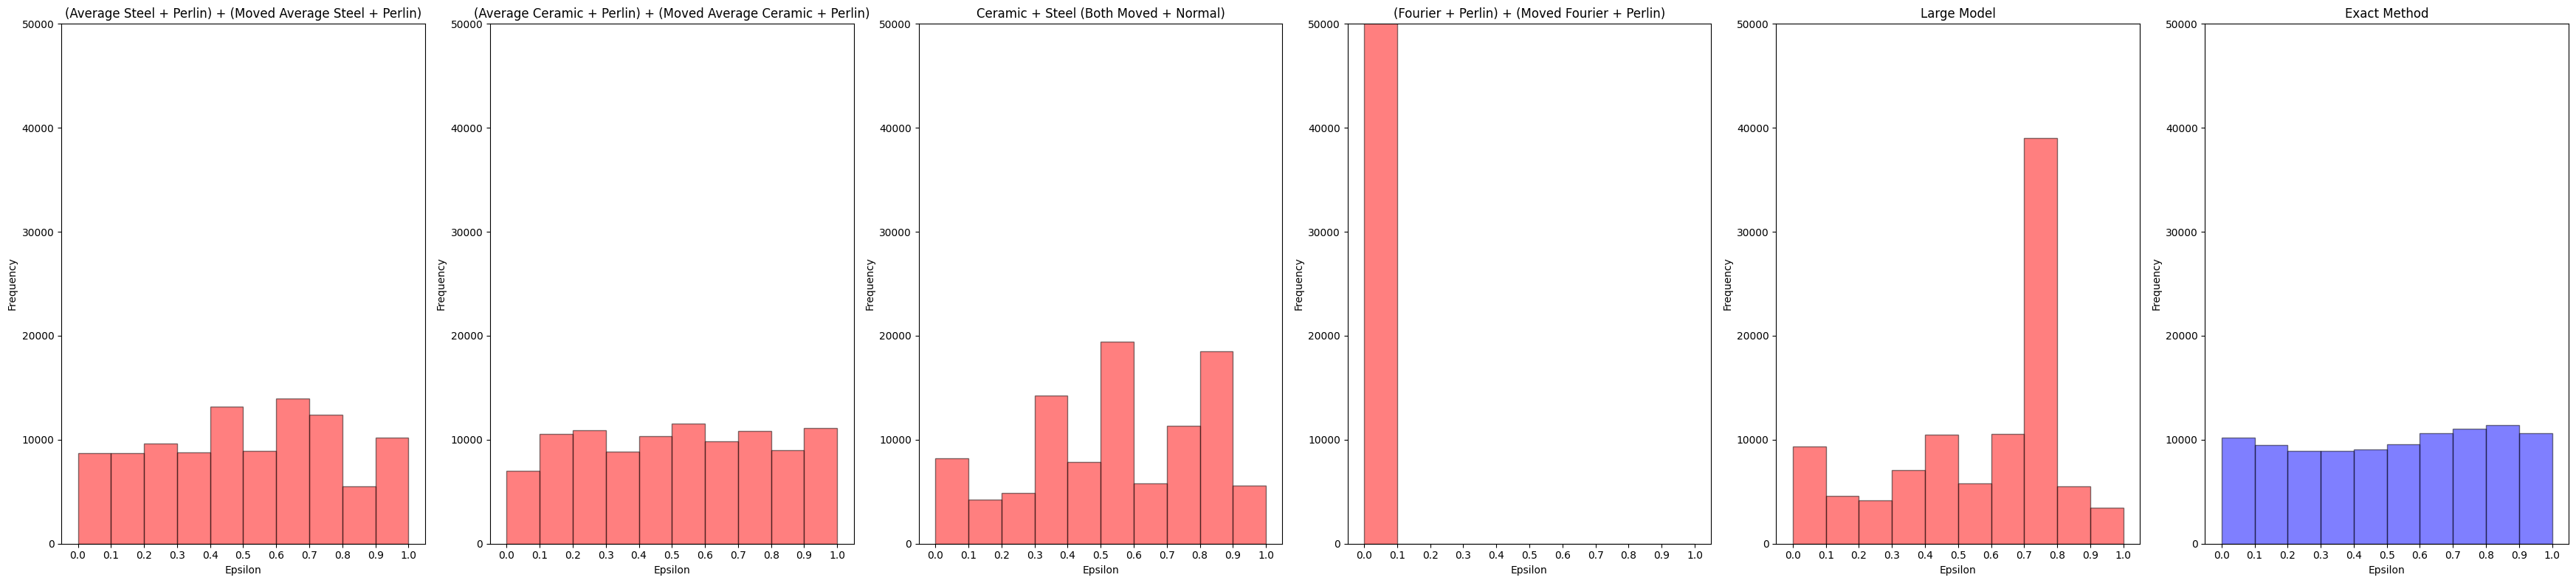

In [16]:
dfs_moved = [moved, moved_ceramic, moved_ceramic_avg, moved_fourier, moved_large, exact]
labels_moved = ["(Average Steel + Perlin) + (Moved Average Steel + Perlin)", "(Average Ceramic + Perlin) + (Moved Average Ceramic + Perlin)", "Ceramic + Steel (Both Moved + Normal)", "(Fourier + Perlin) + (Moved Fourier + Perlin)", "Large Model", "Exact Method"]
plot_multiple_epsilon_distributions(dfs_moved, labels_moved)

Average loss w.r.t the exact method

In [32]:
dfs_cmae = [both_perlin, both_fourier, both_ceramic, both_ceramic_fourier, both_moved]
labels_cmae = labels[0:5]
for i in range(len(dfs_cmae)):
    print(f"Average CMAE for {labels_cmae[i]}: {dfs_cmae[i]['cmae'].mean()}")

Average CMAE for (Average Steel + Perlin): 0.22981485342091298
Average CMAE for (Fourier Steel + Perlin): 0.22122180288899676
Average CMAE for (Ceramic + Perlin): 0.2405860219678451
Average CMAE for (Ceramic + Perlin) + (Fourier + Perlin): 0.2282830087730487
Average CMAE for (Fourier Basics + Perlin): 0.16815233096827406


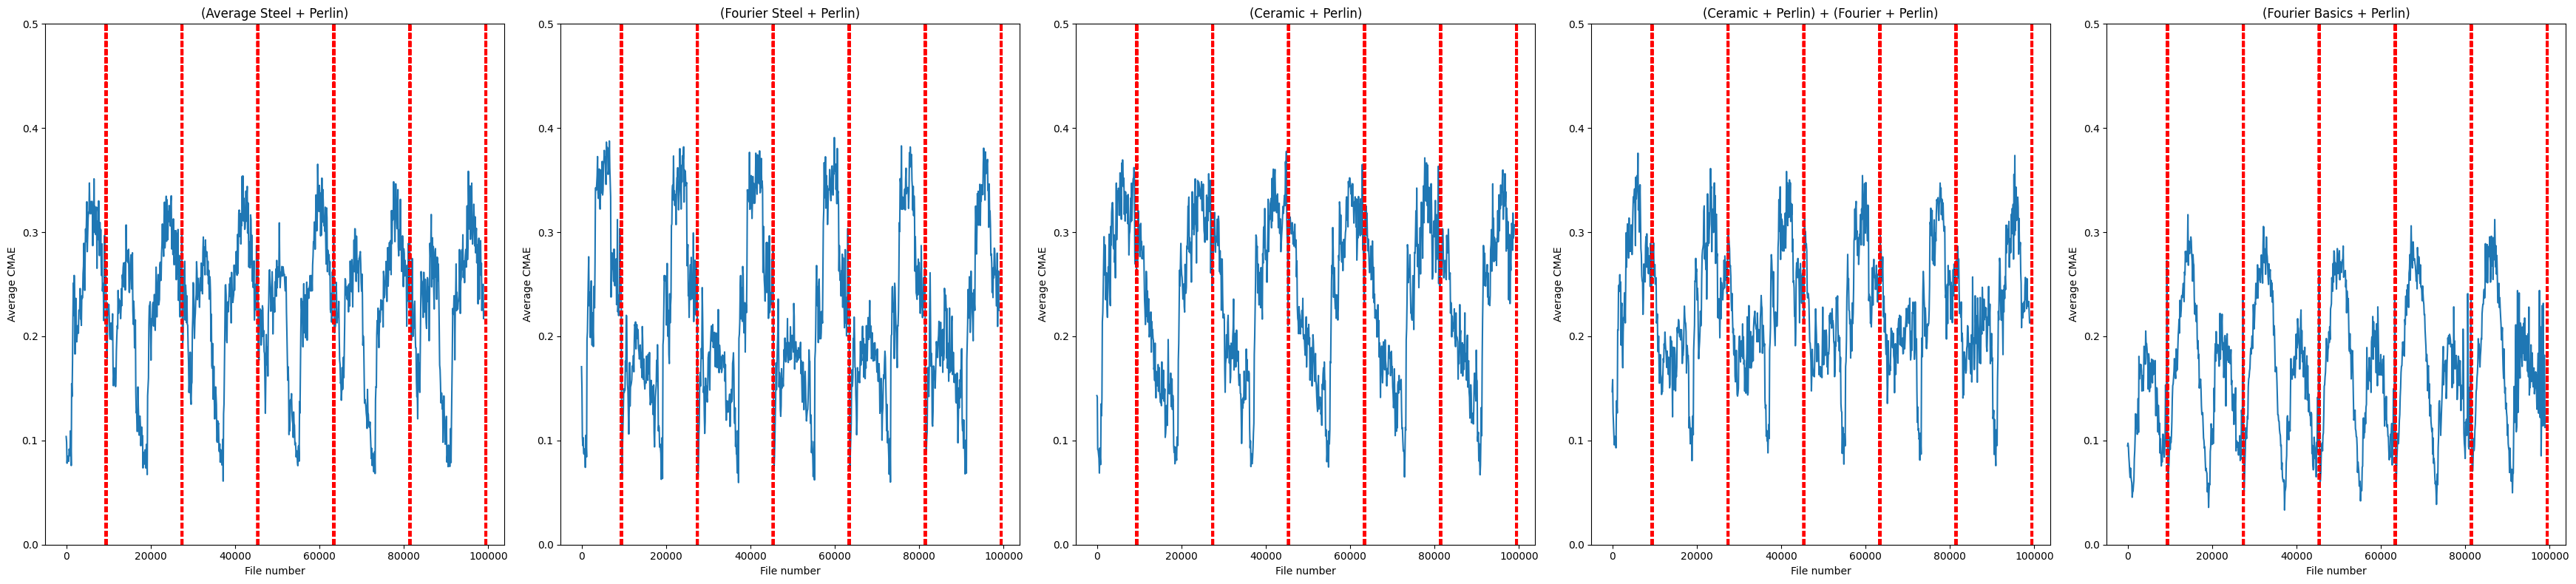

In [33]:
plot_multiple_average_cmae(dfs_cmae, labels_cmae)


In [34]:
dfs_moved_cmae = [both_moved, both_moved_ceramic, both_moved_ceramic_avg, both_moved_fourier, both_moved_large]
labels_moved_cmae = labels_moved[0:5]
for i in range(len(dfs_moved_cmae)):
    print(f"Average CMAE for {labels_moved_cmae[i]}: {dfs_moved_cmae[i]['cmae'].mean()}")

Average CMAE for (Average Steel + Perlin) + (Moved Average Steel + Perlin): 0.16815233096827406
Average CMAE for (Average Ceramic + Perlin) + (Moved Average Ceramic + Perlin): 0.15887942550318962
Average CMAE for Ceramic + Steel (Both Moved + Normal): 0.19126605700594201
Average CMAE for (Fourier + Perlin) + (Moved Fourier + Perlin): 0.24837354702358624
Average CMAE for Large Model: 0.20486560220511812


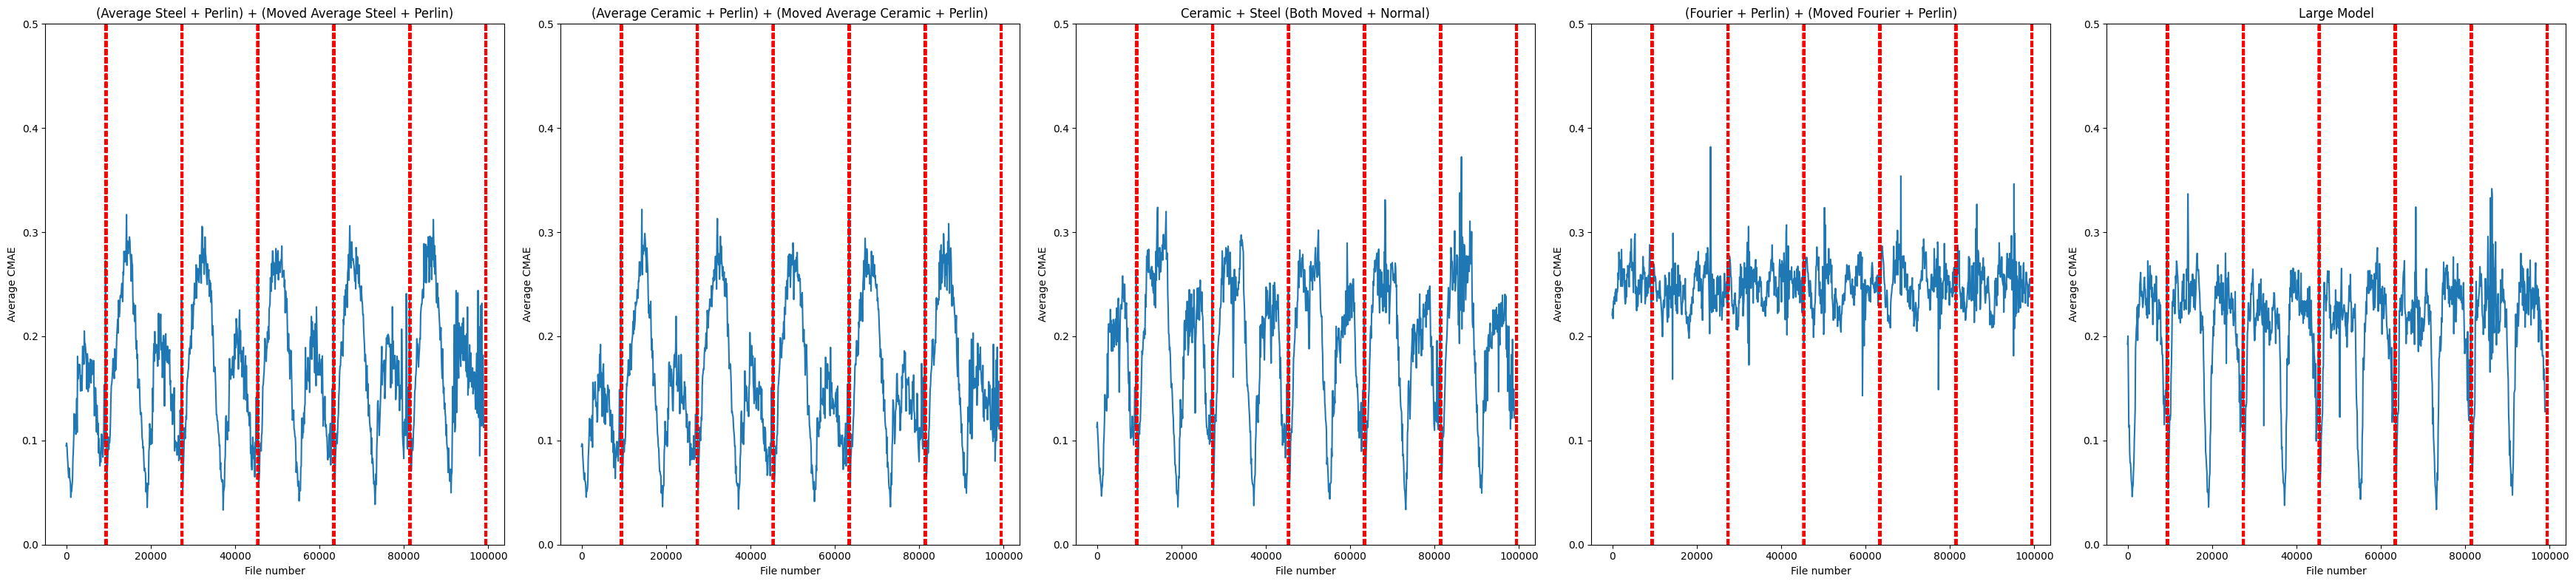

In [35]:
plot_multiple_average_cmae(dfs_moved_cmae, labels_moved_cmae)

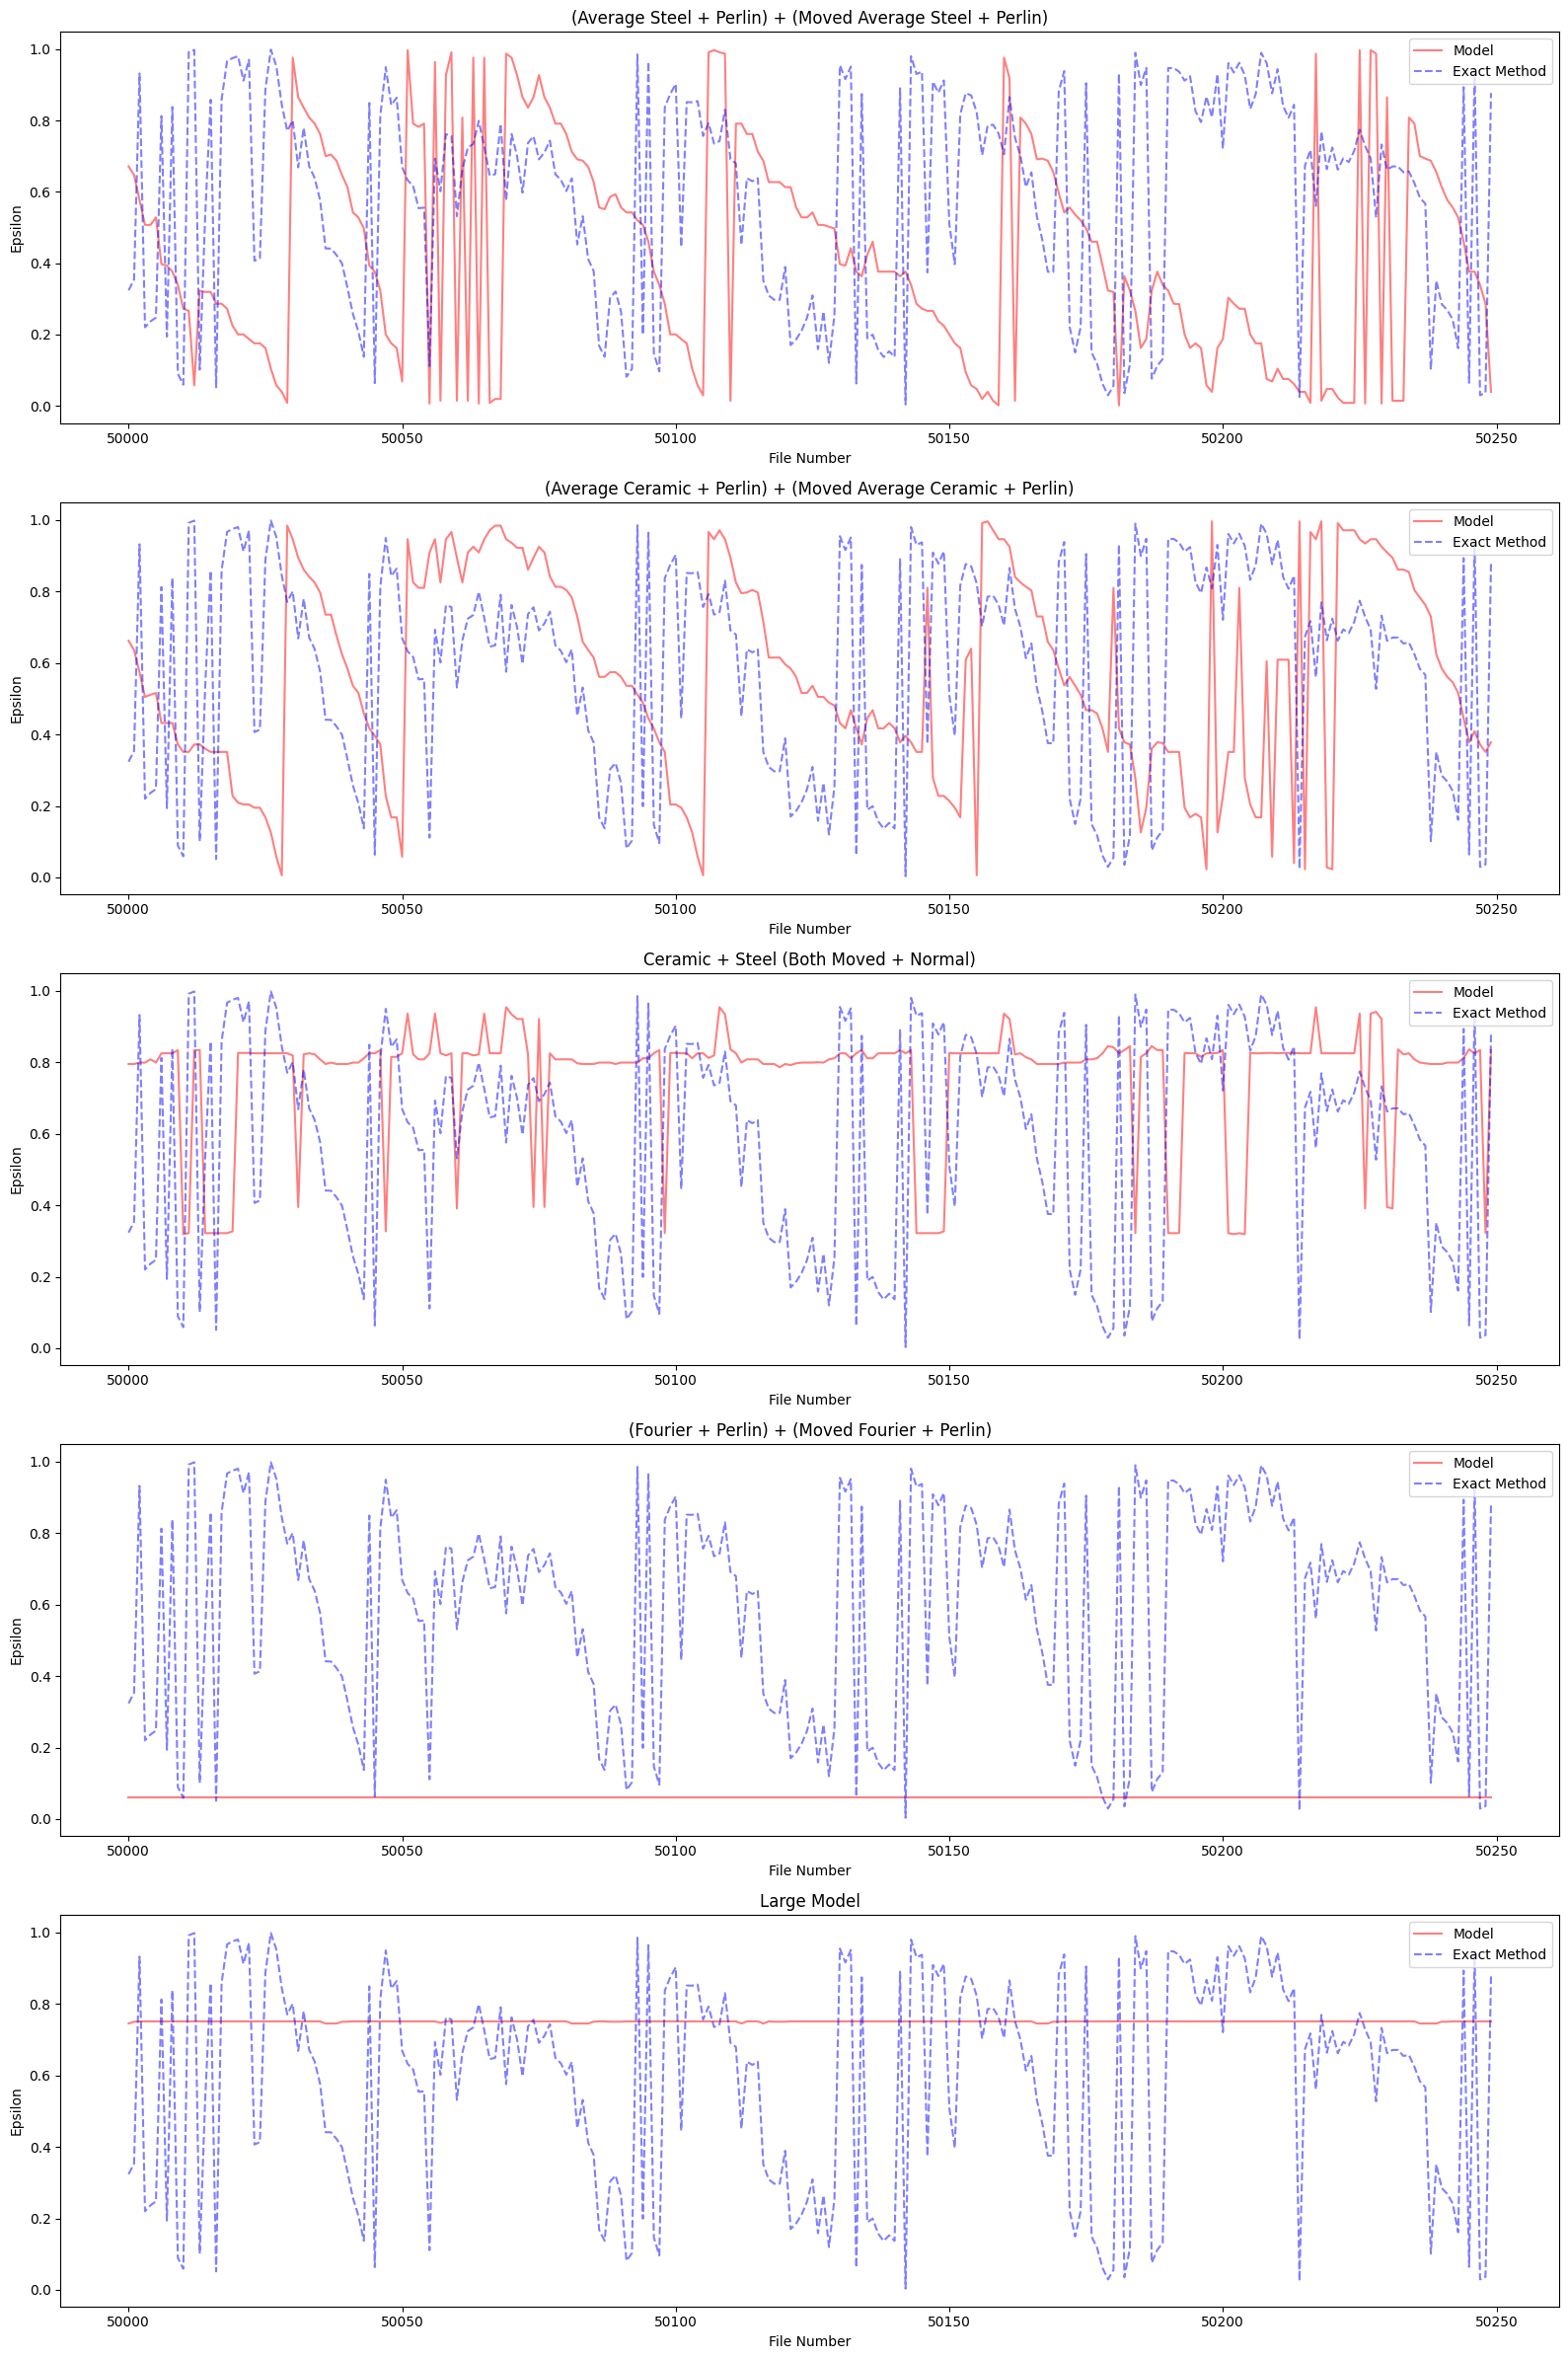

In [36]:
plot_multiple_subareas(dfs_moved_cmae, labels_moved_cmae, start=50000, samples=250)

# Averege Steel with CMAE < 0.1

In [23]:
both_perlin[both_perlin['cmae'] < 0.1].to_csv('perlin_steel_low_cmae.csv', index=False)